In [1]:
import numpy as np
import algorithm_analysis as aa
import cec17.functions as cec
import cec17.functions_info as cec_info
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
def analyze_function(function_name, dims, population_size=50, runs=10, max_iterations = 1000):
    print('run cauchy')
    results_c, progress_c, populations_c = aa.analyze_algorithm(function_name, 'cauchy', runs=runs,
                                                                max_iterations=max_iterations,
                                                                population_size=population_size, dims=dims)
        
    print('run normal')
    results_n, progress_n, populations_n = aa.analyze_algorithm(function_name, 'normal', runs=runs,
                                                                max_iterations=max_iterations,
                                                                population_size=population_size, dims=dims)
        
    real_min = cec.get_shift_matrix(cec_info.function_number[function_name], dims) * 0.5
    
    best_individual_c = populations_c[np.argmin(np.linalg.norm(populations_c - real_min, axis=1))]
    best_individual_n = populations_n[np.argmin(np.linalg.norm(populations_n - real_min, axis=1))]
    
    print('Summary')
    print(tabulate([['population size', population_size],
                    ['runs', runs],
                    ['max_iterations', max_iterations]]
                  ))
    
    print('Results')    
    print(tabulate([['min', np.min(results_c), np.min(results_n)],
                    ['max', np.max(results_c), np.max(results_n)],
                    ['mean', np.mean(results_c), np.mean(results_n)],
                    ['median', np.median(results_c), np.median(results_n)],
                    ['std', np.std(results_c), np.std(results_n)]],
                   headers=['', 'cauchy', 'normal']  
                   ))
    
    print('Population')
    print('target individual', real_min)
    if dims == 2:
        print(tabulate([['average individual', np.mean(populations_c, axis=0), np.mean(populations_n, axis=0)],
                        ['best individual', best_individual_c, best_individual_n],
                        ['average individual error', np.mean(np.linalg.norm(populations_c - real_min, axis=1)),
                                                     np.mean(np.linalg.norm(populations_n - real_min, axis=1))],
                        ['best individual error', np.linalg.norm(best_individual_c - real_min),
                                                  np.linalg.norm(best_individual_n - real_min)]],
                       headers=['', 'cauchy', 'normal']  
                       ))
    else:
        print(tabulate([['average individual error', np.mean(np.linalg.norm(populations_c - real_min, axis=1)),
                                                     np.mean(np.linalg.norm(populations_n - real_min, axis=1))],
                        ['best individual error', np.linalg.norm(best_individual_c - real_min),
                                                  np.linalg.norm(best_individual_n - real_min)]],
                       headers=['', 'cauchy', 'normal']  
                      ))
    
    mean_progress_c = np.mean(progress_c, axis=0)
    mean_progress_n = np.mean(progress_n, axis=0)
    
    plt.plot(mean_progress_c, label='cauchy')
    plt.plot(mean_progress_n, label='normal')    
    plt.legend()

run cauchy
epoch: 1	 result: 0.040677091293360945
epoch: 2	 result: 0.2690826958938999
run normal
epoch: 1	 result: 0.005699999223665486
epoch: 2	 result: 0.1176601134111337
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
           cauchy     normal
------  ---------  ---------
min     0.0406771  0.0057
max     0.269083   0.11766
mean    0.15488    0.0616801
median  0.15488    0.0616801
std     0.114203   0.0559801
Population
target individual [-27.63819925 -35.21477986]
                          cauchy                       normal
------------------------  ---------------------------  ---------------------------
average individual        [-27.95986352 -35.0748327 ]  [-27.54001498 -35.25634117]
best individual           [-27.81768731 -35.13742646]  [-27.63920494 -35.21516637]
average individual error  0.3507900762356826           0.1075455375265019
best individual error     0.19544695888749197          0.00107741

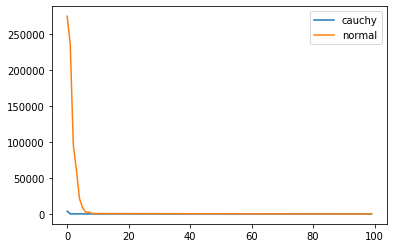

In [3]:
analyze_function('bent_cigar', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
epoch: 1	 result: 0.001723183384768845
epoch: 2	 result: 0.003790066317151286
run normal
epoch: 1	 result: 0.000827413677285449
epoch: 2	 result: 0.0011484386110112155
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
            cauchy       normal
------  ----------  -----------
min     0.00172318  0.000827414
max     0.00379007  0.00114844
mean    0.00275662  0.000987926
median  0.00275662  0.000987926
std     0.00103344  0.000160512
Population
target individual [-27.96916335   2.2715327 ]
                          cauchy                       normal
------------------------  ---------------------------  ---------------------------
average individual        [-28.01332121   2.27275559]  [-27.95506441   2.29685922]
best individual           [-27.99883713   2.29082957]  [-27.95349188   2.29388823]
average individual error  0.04820570483541496          0.029123725204039462
best individual error     0.03539

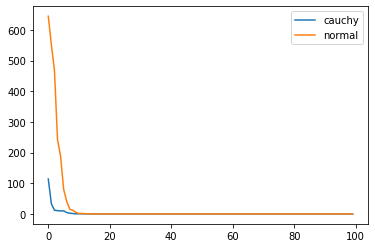

In [4]:
analyze_function('zakharov', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
epoch: 1	 result: 0.019764601792758185
epoch: 2	 result: 0.019764583269761715
run normal
epoch: 1	 result: 0.01976454020194751
epoch: 2	 result: 0.01976454270402428
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
            cauchy       normal
------  ----------  -----------
min     0.0197646   0.0197645
max     0.0197646   0.0197645
mean    0.0197646   0.0197645
median  0.0197646   0.0197645
std     9.2615e-09  1.25104e-09
Population
target individual [16.25536251  3.87765641]
                          cauchy                     normal
------------------------  -------------------------  -------------------------
average individual        [50.         47.75300172]  [50.         47.75464215]
best individual           [50.         47.75284466]  [50.         47.75435941]
average individual error  55.35112000537049          55.3524203392589
best individual error     55.350995512474285         55.352196218

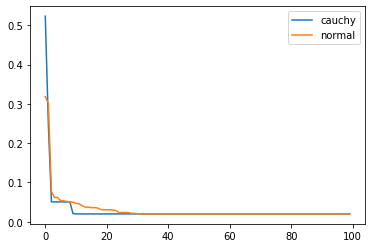

In [5]:
analyze_function('rosenbrock', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
epoch: 1	 result: 0.16340507773634272
epoch: 2	 result: 0.3653791283161354
run normal
epoch: 1	 result: 0.09270660408043341
epoch: 2	 result: 0.08105123381579915
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
          cauchy      normal
------  --------  ----------
min     0.163405  0.0810512
max     0.365379  0.0927066
mean    0.264392  0.0868789
median  0.264392  0.0868789
std     0.100987  0.00582769
Population
target individual [-8.70422518 28.08735165]
                          cauchy                     normal
------------------------  -------------------------  -------------------------
average individual        [-8.72218378 28.10185528]  [-8.70590657 28.08782351]
best individual           [-8.69711275 28.11519234]  [-8.69264562 28.10392801]
average individual error  0.03589013235463812        0.020922811802350005
best individual error     0.02873483274594141        0.02022033316073995


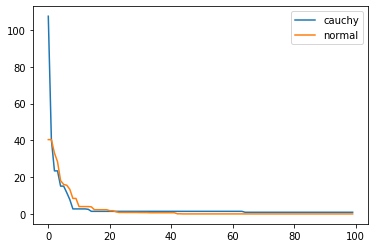

In [6]:
analyze_function('rastrigin', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
epoch: 1	 result: 0.007864806050406514
epoch: 2	 result: 0.009719776157453452
run normal
epoch: 1	 result: 0.009715912338208454
epoch: 2	 result: 0.0002749099779748576
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
             cauchy      normal
------  -----------  ----------
min     0.00786481   0.00027491
max     0.00971978   0.00971591
mean    0.00879229   0.00499541
median  0.00879229   0.00499541
std     0.000927485  0.0047205
Population
target individual [ 39.54469647 -12.28638882]
                          cauchy                       normal
------------------------  ---------------------------  ---------------------------
average individual        [ 40.10748425 -13.79171788]  [ 40.38813194 -10.96083423]
best individual           [ 39.61641301 -12.33868084]  [ 39.53318927 -12.27446217]
average individual error  1.6146130063511017           1.577503820269934
best individual error     0.08875650

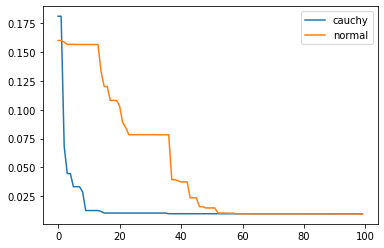

In [7]:
analyze_function('expanded_shaffer_f6', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
epoch: 1	 result: 1.4605257092625834e-07
epoch: 2	 result: 1.1914452215933125e-06
run normal
epoch: 1	 result: 3.6384506074682577e-07
epoch: 2	 result: 1.4260308489610907e-07
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
             cauchy       normal
------  -----------  -----------
min     1.46053e-07  1.42603e-07
max     1.19145e-06  3.63845e-07
mean    6.68749e-07  2.53224e-07
median  6.68749e-07  2.53224e-07
std     5.22696e-07  1.10621e-07
Population
target individual [-12.42812714   0.46712661]
                          cauchy                     normal
------------------------  -------------------------  -------------------------
average individual        [-5.03087482 27.04967919]  [-5.06480778 27.11430029]
best individual           [-5.01722807 27.01178332]  [-5.06694607 27.10862435]
average individual error  27.592607463237265         27.645801444779185
best individual error     27.5597573

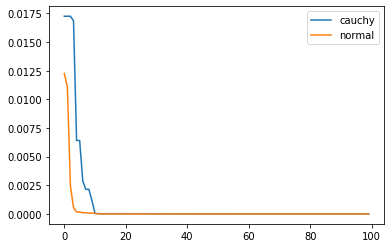

In [8]:
analyze_function('levy', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
epoch: 1	 result: 0.08404985899142048
epoch: 2	 result: 0.07925561932279379
run normal
epoch: 1	 result: 0.005524463491155984
epoch: 2	 result: 0.003763664001780853
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
            cauchy      normal
------  ----------  ----------
min     0.0792556   0.00376366
max     0.0840499   0.00552446
mean    0.0816527   0.00464406
median  0.0816527   0.00464406
std     0.00239712  0.0008804
Population
target individual [-10.93575677 -37.2641027 ]
                          cauchy                       normal
------------------------  ---------------------------  ---------------------------
average individual        [ -0.6604113  -32.84926013]  [ -0.65191145 -32.89364689]
best individual           [ -5.12261488 -22.58445591]  [-10.92488993 -37.28192673]
average individual error  15.822448935541775           11.182931354946634
best individual error     15.78875069056369  

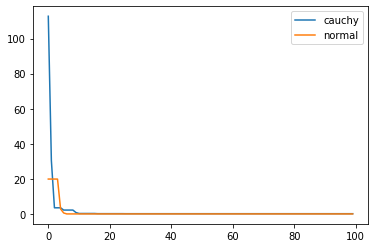

In [9]:
analyze_function('schwefel', dims=2, population_size=50, runs=2, max_iterations = 100)

In [10]:
from cec17.functions import *

In [11]:
modal_function('levy', np.array([[-2.4856254283737513e+01,   9.3425322367542663e-01]]), modify = True, random_modification = False)

array([800.71584455])